In [14]:
# import dependencies
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# read csv on carbon emission data and convert to pandas dataframe
carbon = pd.read_csv('../resources/data/carbon_by_country.csv')

# select only emissions in gigatons of carbon (GtC) by USA since 1969
carbon = carbon[['year', 'USA']].loc[carbon['year'] >= 1969,:]

# rename 'USA' column to 'emissions(GtC)'
carbon = carbon.rename(columns={'USA': 'emissions(GtC)'})

# reset index
carbon = carbon.reset_index(drop=True)


In [3]:
# create funciton to calculate total accumulated carbon emissions(GtC)
def total(x):
    return carbon.loc[carbon['year'] < x,:]['emissions(GtC)'].sum()

# create column with total accumulated carbon emissions for each year
carbon['accumulated(GtC)'] = carbon['year'].apply(total)


In [4]:
# create funciton to calculate scaled dft size
def scale(x):
    return (x-0)/(70730-0)*(1048576-32)+32

# create column with scaled dft size for each year
carbon['dft_size'] = carbon['accumulated(GtC)'].apply(scale)


In [5]:
# create funciton to calculate viable fft size
def fft_size(x):
    return 1 if x == 0 else int(2**math.floor(math.log2(x)))

# create column with viable fft size for each year
carbon['fft_size'] = carbon['dft_size'].apply(fft_size)


In [6]:
# create dictionary to hold fft sizes and frequency resoulutions in hertz(Hz)
freq_res = {}

# all unique fft sizes used
ffts = carbon['fft_size'].unique()

# frequency resolutions for corresponding fft sizes
Hz = [20000, 86, 21, 10, 5, 2, 1, 0.5]

# add fft sizes and frequency resoulutions to dictionary
for i in range(0, len(ffts)):
    freq_res[ffts[i]] = Hz[i]

# create column with frequency resolutions for each year
carbon['freq_res(Hz)'] = carbon['fft_size'].map(freq_res)


In [7]:
# create funciton to calculate file names
def file(x):
    
    # iterate through unique fft sizes
    for i in range(0, len(ffts)):
        
        # if the indexed fft size matches the current year's fft size:
        if ffts[i] == x:
            
            # return the file name with the number as the index plus 1
            return f'jimi{i+1}.aiff'

# create column with file name for each year
carbon['file'] = carbon['fft_size'].apply(file)


In [8]:
# create function to calculate starting times in seconds(s) for each file
def file_begin(x):
    
    # number of years represented by previous files
    previous = 0
    
    # iterate through previous files
    for i in range(0, int(x[4])):
        
        # add the number of years represented by each previous file to previous
        previous = previous + len(carbon.loc[carbon['file'] == f'jimi{i}.aiff',:])

    # return file start time as previous years multiplied by scaled length of a year in audio playback(s)
    return previous*4.774

# create column for starting times of each file
carbon['file_begin(s)'] = carbon['file'].apply(file_begin)


In [9]:
# create function to calculate playback starting times in milliseconds(ms) for each year
def play_begin(x):
    
    # file associated with year
    file = carbon.loc[carbon['year'] == x,:]['file'].unique()[0]
    
    # years represented by file
    years = carbon.loc[carbon["file"] == file,:].reset_index()
    
    
    for i in range(0, len(years)):
        
        # if the year matches the indexed year:
        if years['year'][i] == x:
            
            # return play start time as year's index multiplied by scaled length of a year in audio playback(ms)
            return i*4774

# create column for playback starting times for each year
carbon['play_begin(ms)'] = carbon['year'].apply(play_begin)


In [10]:
# create function to calculate ending times(s) for each file
def file_end(x):
    
    # last file ends at ending of manipulated audio
    if x == 'jimi8.aiff':
        return 243.484
    
    # for all other files:
    else:
        # years represented by current file
        years = carbon.loc[carbon["file"] == x,:]
        
        # final year represented by a file is 8.354 seconds to allow crossfading into next year
        final_year = 8.354
        
        # other years multiplied by scaled length of a year in audio playback(ss)
        other_years = (len(years)-1)*4.774
        
        # return file end time as begining time plus scaled length of years represented by file
        return file_begin(x) + final_year + other_years

# create column for ending times of each file
carbon['file_end(s)'] = carbon['file'].apply(file_end)


In [11]:
# display full dataframe
carbon


,year,emissions(GtC),accumulated(GtC),dft_size,fft_size,freq_res(Hz),file,file_begin(s),play_begin(ms),file_end(s)
0,1969,1098.0,0.0,3.200000e+01,32,20000.0,jimi1.aiff,0.000,0,8.354
1,1970,1181.0,1098.0,1.630941e+04,8192,86.0,jimi2.aiff,4.774,0,13.128
2,1971,1188.0,2279.0,3.381726e+04,32768,21.0,jimi3.aiff,9.548,0,22.676
3,1972,1244.0,3467.0,5.142889e+04,32768,21.0,jimi3.aiff,9.548,4774,22.676
4,1973,1300.0,4711.0,6.987069e+04,65536,10.0,jimi4.aiff,19.096,0,41.772
5,1974,1254.0,6011.0,8.914267e+04,65536,10.0,jimi4.aiff,19.096,4774,41.772
6,1975,1201.0,7265.0,1.077327e+05,65536,10.0,jimi4.aiff,19.096,9548,41.772
7,1976,1257.0,8466.0,1.255371e+05,65536,10.0,jimi4.aiff,19.096,14322,41.772
8,1977,1292.0,9723.0,1.441716e+05,131072,5.0,jimi5.aiff,38.192,0,75.190
9,1978,1333.0,11015.0,1.633250e+05,131072,5.0,jimi5.aiff,38.192,4774,75.190


In [12]:
# dataframe to export in csv
csv = carbon[['file', 'play_begin(ms)']].set_index('file')

# export dataframe as csv
csv.to_csv('../resources/data/carbon.csv')


In [13]:
# group years by file name
files_group = carbon.groupby('file')

# create dictionary to hold data for files
files = {}

# columns to extract data from
columns = ['fft_size', 'freq_res(Hz)', 'file_begin(s)', 'file_end(s)']

# iterate through columns
for c in columns:
    
    # create key to hold list with data for each column
    files[c] = []
    
    # append each column's data points to its respective list
    for u in files_group[c].unique():
        files[c].append(u[0])

# create dataframe out of files dictionary
files = pd.DataFrame(files)

# set files index as file name
files = files.set_index(carbon['file'].unique())

# display dataframe
files


,fft_size,freq_res(Hz),file_begin(s),file_end(s)
jimi1.aiff,32,20000.0,0.000,8.354
jimi2.aiff,8192,86.0,4.774,13.128
jimi3.aiff,32768,21.0,9.548,22.676
jimi4.aiff,65536,10.0,19.096,41.772
jimi5.aiff,131072,5.0,38.192,75.190
jimi6.aiff,262144,2.0,71.610,137.252
jimi7.aiff,524288,1.0,133.672,242.280
jimi8.aiff,1048576,0.5,238.700,243.484


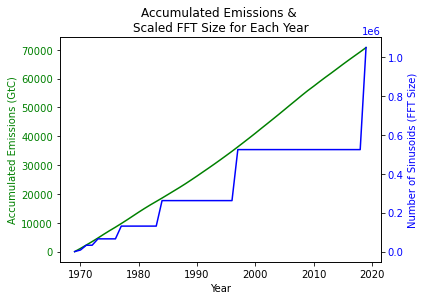

In [32]:
# values for x axis
x = carbon['year']

# values for y axes
y1 = carbon['accumulated(GtC)']
y2 = carbon['fft_size']

# create plot to hold multiple axes
fig, ax1 = plt.subplots()

# add parameters/values for first axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Accumulated Emissions (GtC)', color='green')
ax1.plot(x, y1, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# add parameters/values for second axis
ax2.set_ylabel('Number of Sinusoids (FFT Size)', color='blue')
ax2.plot(x, y2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# ensure right y-label isn't clipped
fig.tight_layout()

plt.title('Accumulated Emissions & \nScaled FFT Size for Each Year', fontsize=12)

# show plot
plt.show()
